# Data Visualization

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = "NZDUSD=X"
supporting_predictor_names = [
    'RAW-EMA-2',
    'RAW-EMA-3',
    'RAW-EMA-5',
    'RAW-EMA-7',
    'RAW-EMA-21',
    'RAW-EMA-50'
]

In [3]:
predictors = pd.read_csv('./' + ticker + '_input_signals.csv')
predictors_list = list(predictors.columns)
supporting_predictors = predictors[supporting_predictor_names]
predictors = predictors.drop(supporting_predictor_names, axis = 1)
predictors

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,EMA-7,EMA-21,EMA-50,RSI,MACD,ADX,STD,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,-0.002277,0.000298,-0.000909,0.515714,0.001007,0.154273,0.002375,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,-0.002628,-0.000845,-0.002052,0.500428,0.000573,0.146584,0.002571,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,-0.001425,-0.000106,-0.001272,0.509713,0.000313,0.138918,0.002666,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,-0.000089,0.001091,0.000033,0.526721,0.000212,0.129965,0.001016,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001266,0.002608,0.001739,0.549598,0.000245,0.123905,0.001306,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,0.704002,0.705430,0.702500,0.704052,0.704052,0,-0.000088,-0.003287,-0.003098,-0.002947,...,0.000200,0.008570,0.020727,0.676821,-0.000012,0.443293,0.001506,0.006025,-0.004897,-0.001129
3718,0.704072,0.709512,0.703700,0.704072,0.704072,0,0.000020,-0.000068,-0.003267,-0.003078,...,0.000165,0.007809,0.019934,0.677012,-0.000312,0.448389,0.001548,0.006191,-0.004374,-0.001817
3719,0.701740,0.708421,0.701538,0.701641,0.701641,0,-0.002430,-0.002411,-0.002499,-0.005697,...,-0.001699,0.004889,0.016817,0.627907,-0.000714,0.445866,0.001813,0.007251,-0.006233,-0.001018
3720,0.709280,0.711101,0.707559,0.709401,0.709401,0,0.007760,0.005329,0.005349,0.005261,...,0.004545,0.011499,0.023613,0.702180,-0.000507,0.446968,0.002553,0.010210,-0.000365,-0.009845


In [4]:
target = pd.read_csv('./' + ticker + '_output_signals.csv')

## Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
features = predictors.columns[6:]

# Separating out the features
x = predictors.loc[:, features].values

# Getting out the target
y = target.values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.299335,-0.778380,-0.302762,-0.513378,-0.226257,-0.486076,-0.514115,-0.461748,-0.365084,0.006937,-0.070241,0.073765,0.529298,-0.843161,-0.756728,-0.756728,0.071972,0.970183
1,-0.217814,-0.369384,-0.756954,-0.371852,-0.557249,-0.368166,-0.446633,-0.471577,-0.419749,-0.087350,-0.130031,-0.053947,0.299291,-0.916425,-0.682280,-0.682280,0.046898,0.895465
2,0.122638,-0.067846,-0.228155,-0.594751,-0.277485,-0.006509,-0.116357,-0.221932,-0.232395,-0.026398,-0.089245,0.023627,0.161503,-0.989476,-0.646401,-0.646401,0.186937,0.684194
3,0.223467,0.247489,0.074711,-0.085383,-0.431620,0.209513,0.136603,0.020375,-0.024249,0.072450,-0.020966,0.165719,0.107942,-1.074793,-1.271173,-1.271173,0.837174,0.804519
4,0.305321,0.378032,0.377770,0.218468,0.061042,0.359022,0.334377,0.243509,0.186761,0.197574,0.068253,0.356848,0.125623,-1.132540,-1.161193,-1.161193,0.953553,0.517383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,-0.019498,-0.414797,-0.319384,-0.265637,0.161275,-0.181585,-0.201665,-0.109348,0.020640,0.689645,1.061374,1.419748,-0.010989,1.910935,-1.085435,-1.085435,0.435001,1.009381
3718,-0.000687,-0.014258,-0.336416,-0.277160,-0.237891,-0.061085,-0.101290,-0.073251,0.015179,0.626832,1.019855,1.421344,-0.169706,1.959501,-1.069757,-1.069757,0.494723,0.918756
3719,-0.427436,-0.305766,-0.258922,-0.506382,-0.440121,-0.424980,-0.422800,-0.370324,-0.275152,0.385885,0.856834,1.011087,-0.382679,1.935458,-0.969466,-0.969466,0.282237,1.023994
3720,1.347344,0.657523,0.532907,0.452698,0.152895,1.134154,0.962280,0.767190,0.697505,0.931420,1.212286,1.631610,-0.272953,1.945956,-0.689352,-0.689352,0.953099,-0.138733


## PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1', 'principal component 2', 'principal component 3' ]
)

principalDf

,principal component 1,principal component 2,principal component 3
0,1.040320,-1.630038,0.560741
1,1.168632,-1.435371,0.234163
2,0.436559,-1.200324,-0.150148
3,-0.405780,-2.066959,-0.629408
4,-1.162714,-1.812297,-0.553006
...,...,...,...
3717,-0.344334,-2.001954,0.866951
3718,-0.383663,-1.877908,0.546351
3719,0.571978,-1.825662,0.588272
3720,-2.928195,-0.670688,-0.430609


In [8]:
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=["target"])], axis = 1)

In [9]:
finalDf

,principal component 1,principal component 2,principal component 3,target
0,1.040320,-1.630038,0.560741,0
1,1.168632,-1.435371,0.234163,1
2,0.436559,-1.200324,-0.150148,0
3,-0.405780,-2.066959,-0.629408,0
4,-1.162714,-1.812297,-0.553006,0
...,...,...,...,...
3717,-0.344334,-2.001954,0.866951,0
3718,-0.383663,-1.877908,0.546351,0
3719,0.571978,-1.825662,0.588272,1
3720,-2.928195,-0.670688,-0.430609,0


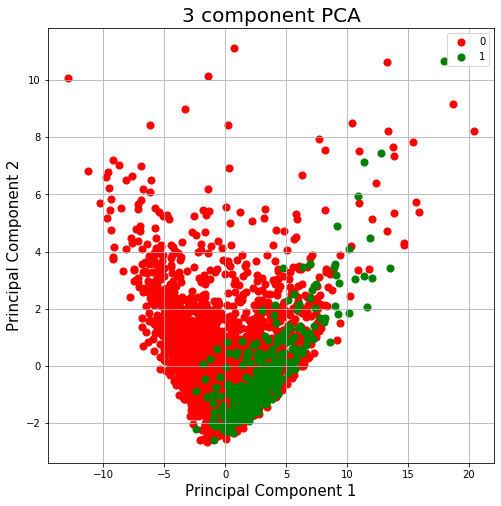

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'],
        finalDf.loc[indicesToKeep, 'principal component 2'],
        c = color,
        s = 50
    )

ax.legend(targets)
ax.grid()

In [11]:
signal = finalDf.where(
    finalDf["target"]==1,
).dropna()

no_signal = finalDf.where(
    finalDf["target"]==0,
).dropna()

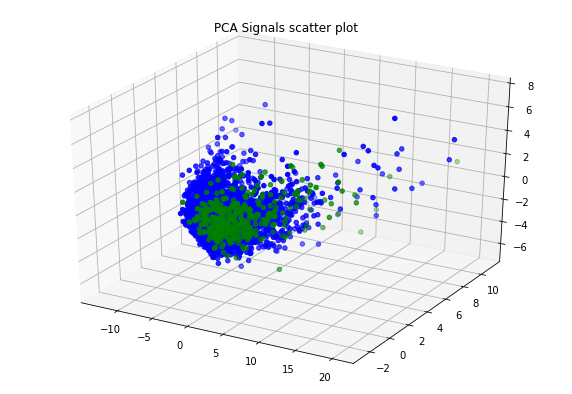

In [12]:
# %matplotlib notebook

# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
# z = np.random.randint(100, size =(50))
# x = np.random.randint(80, size =(50))
# y = np.random.randint(60, size =(50))

x_signal = signal["principal component 1"].values
y_signal = signal["principal component 2"].values
z_signal = signal["principal component 3"].values

x_no_signal = no_signal["principal component 1"].values
y_no_signal = no_signal["principal component 2"].values
z_no_signal = no_signal["principal component 3"].values


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x_signal, y_signal, z_signal, color = "green")
ax.scatter3D(x_no_signal, y_no_signal, z_no_signal, color = "blue")

plt.title("PCA Signals scatter plot")

# show plot
plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.58386003, 0.15774874, 0.10278264])

## SVM

In [14]:
from sklearn import svm
X = np.array([
    [3, 0], [1, 1]
])
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# !pip3 install mlxtend

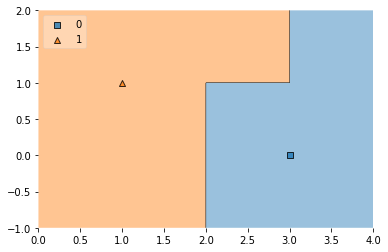

In [16]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

y = np.array([0, 1])
plot_decision_regions(X, y, clf=clf, legend=2)
plt.show()

### PCA Try #1

In [17]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

In [18]:
X = finalDf[["principal component 1", "principal component 2", "principal component 3"]]
Y = finalDf["target"]

In [19]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(
        X,
        Y,
        test_size=0.10,
        random_state=42,
        shuffle=False
)

In [65]:
import math

def custom_svm_score(test_Y, y_pred):
    false_positives = confusion_matrix(test_Y, y_pred)[0][1]
    false_positives = math.pow(false_positives, 2)
    true_positives = confusion_matrix(test_Y, y_pred)[1][1]
    true_positives = math.pow(true_positives, 2)
    score = true_positives - false_positives
    return score

def svm_ratio_false_positives(test_Y, y_pred):
    false_positives = confusion_matrix(test_Y, y_pred)[0][1]
    true_positives = confusion_matrix(test_Y, y_pred)[1][1]
    return false_positives/true_positives

In [69]:
i = 4
model = svm.SVC(kernel='linear',class_weight= {0: 1, 1: i})
clf = model.fit(train_X, train_Y)
y_pred = clf.predict(test_X)
print(svm_ratio_false_positives(test_Y, y_pred))
confusion_matrix(test_Y, y_pred)

3.0


array([[301,  39],
       [ 20,  13]])

In [ ]:
from sklearn.metrics import confusion_matrix

def svm_search_grid(test_Y, y_pred):
    svm_scores = []
    for i in range(0, 100):
        # model = svm.SVC(kernel='linear', class_weight='balanced')
        model = svm.SVC(
            kernel='linear',
                class_weight= {
                    0: 1,
                    1: i
                }
        )

        clf = model.fit(train_X, train_Y)
        y_pred = clf.predict(test_X)
        score = custom_svm_score(test_Y, y_pred)
        print('iter: ' + str(i))
        svm_scores.append(score)

    return svm_scores
svm_search_grid(test_Y, y_pred)

In [70]:
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

In [71]:
pd.DataFrame({
            'Predictions': y_pred,
            'Actual': test_Y
})

,Predictions,Actual
3349,0,0
3350,0,0
3351,1,0
3352,0,1
3353,0,0
...,...,...
3717,0,0
3718,0,0
3719,0,1
3720,0,0


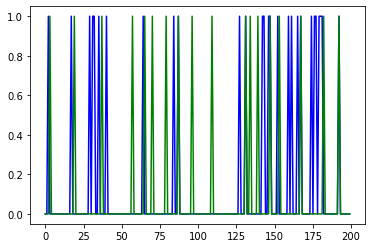

In [73]:
plt.plot(y_pred[:200], c="b")
plt.plot(test_Y.to_numpy()[:200], c="g")
plt.show()

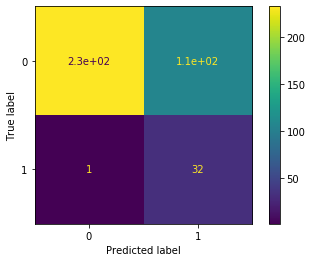

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_X, test_Y)

In [28]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_Y, y_pred)
# Recall
from sklearn.metrics import recall_score
recall_score(test_Y, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(test_Y, y_pred, average=None)

array([0.9957265 , 0.23021583])

In [29]:
# fig = plt.figure()
# ax  = fig.add_subplot(111, projection='3d')

# x_signal = signal["principal component 1"].values
# y_signal = signal["principal component 2"].values
# z_signal = signal["principal component 3"].values

# x_no_signal = no_signal["principal component 1"].values
# y_no_signal = no_signal["principal component 2"].values
# z_no_signal = no_signal["principal component 3"].values

# ax.plot3D(x_no_signal, y_no_signal, z_no_signal,'ob')
# ax.plot3D(x_signal, y_signal, z_signal,'sr')
# ax.plot_surface(x, y, z(x,y))
# ax.view_init(30, 60)
# plt.show()